In [1]:
import os
from pathlib import Path 

In [2]:
path = Path('data')
os.listdir(path)

['extra',
 'label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_extra.csv',
 'train_extra_full',
 'train_images',
 'train_old.csv',
 'train_processed.csv']

In [3]:
train = pd.read_csv(path/'train_extra.csv')
train

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
27048,extra/train/healthy/train-healthy-95.jpg,4
27049,extra/train/healthy/train-healthy-96.jpg,4
27050,extra/train/healthy/train-healthy-97.jpg,4
27051,extra/train/healthy/train-healthy-98.jpg,4


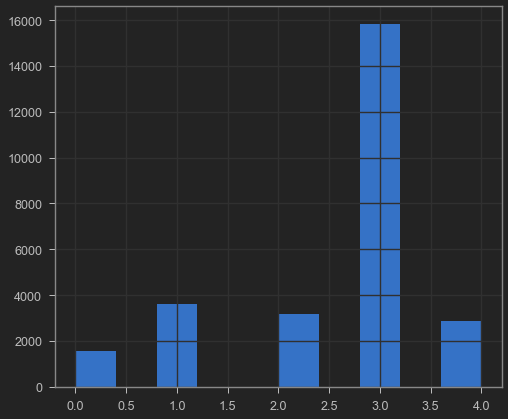

In [4]:
train.label.hist()
plt.show()

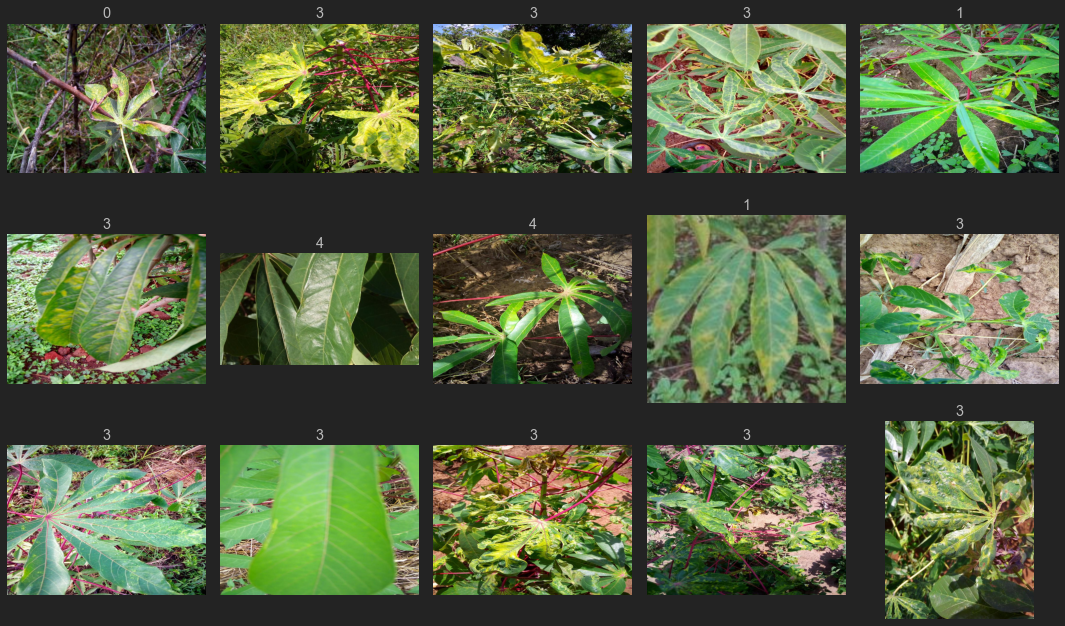

In [5]:
import random 
import cv2

r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(train)-1)
        img = cv2.imread(str(path/train['image_id'][ix]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        label = train['label'][ix]
        plt.axis("off")
        plt.imshow(img)
        plt.title(label)
plt.tight_layout()
plt.show()

In [6]:
from src import DataModule

size=512
train_trans = {
    'PadIfNeeded': {
        'min_height': size, 
        'min_width': size,
        'border_mode': 0 
    },
    'RandomCrop': {
        'height': size, 
        'width': size
    },
    'HorizontalFlip': {},
    'VerticalFlip': {}
}

val_trans = {
    'PadIfNeeded': {
        'min_height': size, 
        'min_width': size,
        'border_mode': 0
    },
    'CenterCrop': {
        'height': size, 
        'width': size
    }
}


dm = DataModule(
    train_trans=train_trans, 
    val_trans=val_trans
)

dm.setup()

Training samples:  21642
Validation samples:  5411


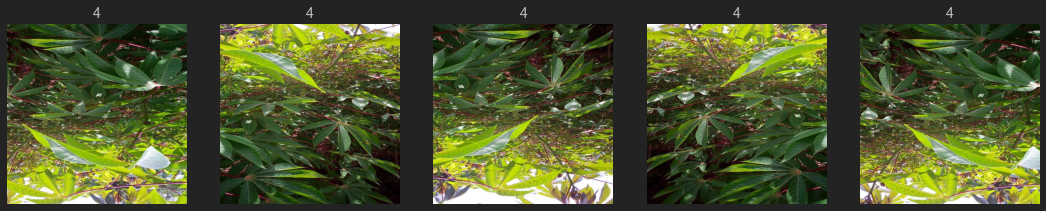

In [14]:
r, c = 1, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.train_ds
ix = random.randint(0, len(ds))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        img, label = ds[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label.item())
plt.tight_layout()
plt.show()

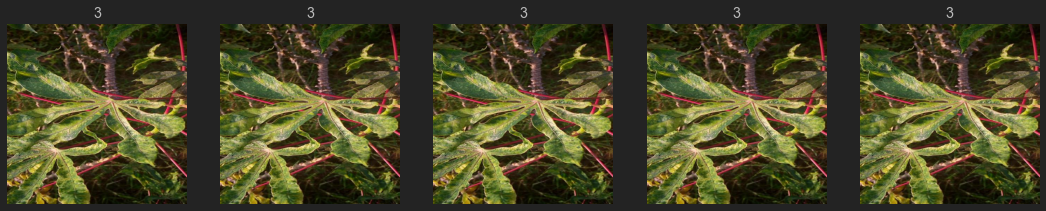

In [8]:
r, c = 1, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.val_ds
ix = random.randint(0, len(ds))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        img, label = ds[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label.item())
plt.tight_layout()
plt.show()